In [3]:
import numpy as np
import pandas as pd
import os


In [4]:
data = pd.read_csv('f1.csv')
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


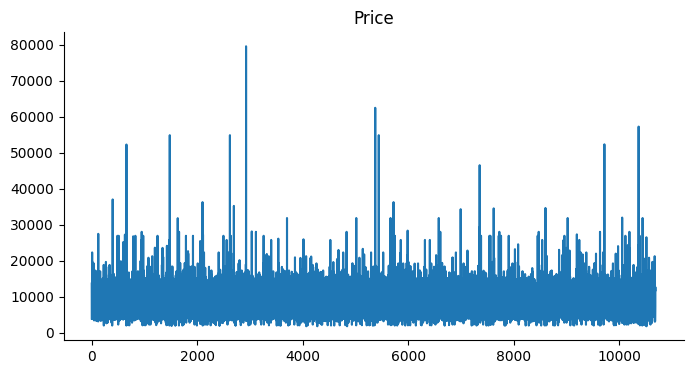

In [6]:
# @title Price

from matplotlib import pyplot as plt
data['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

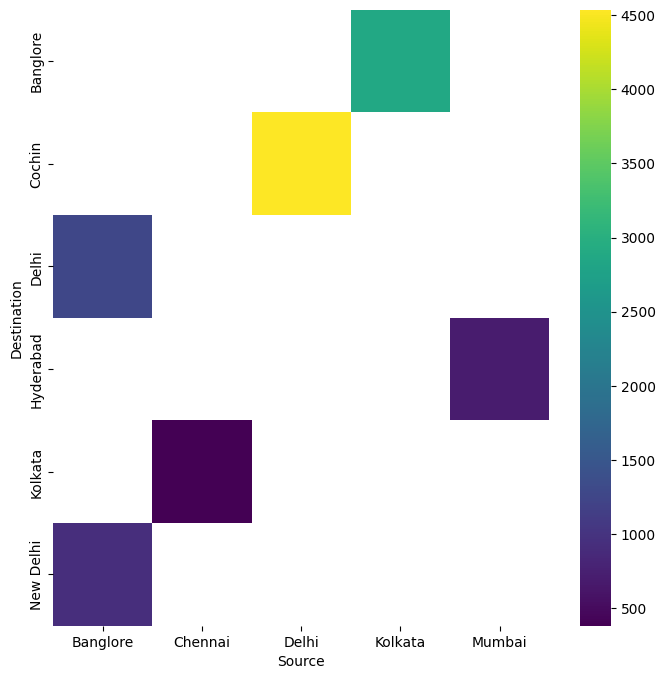

In [5]:
# @title Source vs Destination

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Destination'].value_counts()
    for x_label, grp in data.groupby('Source')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Source')
_ = plt.ylabel('Destination')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [8]:
print(data.isnull().sum())
print(data.duplicated().sum())

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64
222


In [9]:
data.drop_duplicates(inplace = True)

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [11]:
import numpy as np

def kmeans(data, k, max_iter=100):
    """
    Реализация алгоритма k-means.

    Параметры:
    - data: массив данных, размерность (n_samples, n_features)
    - k: количество кластеров
    - max_iter: максимальное количество итераций

    Возвращает:
    - centroids: центры кластеров, размерность (k, n_features)
    - labels: метки кластеров для каждого образца, размерность (n_samples,)
    """
    # Инициализация центров кластеров случайными значениями из данных
    centroids = data[np.random.choice(data.shape, k, replace=False)]

    # Инициализация меток кластеров
    labels = np.zeros(data.shape, dtype=int)

    # Итеративное обновление центров и меток
    for _ in range(max_iter):
        # Расчет расстояний от каждого образца до центров кластеров
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

        # Обновление меток кластеров
        labels = np.argmin(distances, axis=1)

        # Обновление центров кластеров
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Проверка на сходимость
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

In [12]:
from sklearn.cluster import KMeans

data = pd.read_csv('f1.csv')
data.drop(['Airline', 'Source', 'Destination'], axis= 1 , inplace= True)
clusterer = KMeans(n_clusters=5, random_state=42, n_init=100)
cluster_labels = clusterer.fit_predict(data)
data['Cluster'] = cluster_labels

In [13]:
data

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Cluster
0,0,3897,24,3,2019,22,20,1,10,2,50,2
1,2,7662,1,5,2019,5,50,13,15,7,25,0
2,2,13882,9,6,2019,9,25,4,25,19,0,1
3,1,6218,12,5,2019,18,5,23,30,5,25,0
4,1,13302,1,3,2019,16,50,21,35,4,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,2,30,2
10679,0,4145,27,4,2019,20,45,23,20,2,35,2
10680,0,7229,27,4,2019,8,20,11,20,3,0,0
10681,0,12648,1,3,2019,11,30,14,10,2,40,4
